In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# de XLSX a CSV

In [6]:
# Ruta a tu archivo Excel
excel_file = './data/Estadisticas_historicas_comercializacion.xlsx'

os.makedirs('data', exist_ok=True)

# ajusta estos valores según tu archivo:
skip_top = 6     # filas de encabezado a omitir
skip_bottom = 3  # filas de pie de página a omitir

df_import = pd.read_excel(
    excel_file,
    sheet_name='IMPORTACION',
    engine='openpyxl',
    skiprows=skip_top,
    skipfooter=skip_bottom
)
df_consumo = pd.read_excel(
    excel_file,
    sheet_name='CONSUMO',
    engine='openpyxl',
    skiprows=skip_top,
    skipfooter=skip_bottom
)

df_import.to_csv('data/importacion.csv', index=False, encoding='utf-8-sig')
df_consumo.to_csv('data/consumo.csv',    index=False, encoding='utf-8-sig')

print("Listo: data/importacion.csv y data/consumo.csv creados sin header ni footer.")

Listo: data/importacion.csv y data/consumo.csv creados sin header ni footer.


# Analisis Exploratorio Consumo

In [9]:
df = pd.read_csv('data/consumo.csv', parse_dates=['Fecha'])
df

,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gas natural,...,Kerosina,Mezclas\r\noleosas,Naftas,PetCoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,Orimulsión,Total
0,2000-01-01,0.00,48446.00,296766.99,0.00,0.00,0.00,0.00,194410.476190,NaN,...,64026.09,0.00,0.00,0.00,0.00,0.00,0.0,634667.06,0,1.750545e+06
1,2000-02-01,0.00,50597.00,328116.44,0.00,0.00,0.00,0.00,174710.552381,NaN,...,62660.30,0.00,0.00,0.00,0.00,0.00,0.0,642380.66,0,1.773220e+06
2,2000-03-01,0.00,27593.00,368589.63,0.00,0.00,0.00,0.00,189234.066667,NaN,...,61361.99,0.00,0.00,0.00,0.00,0.00,0.0,699807.25,0,1.909499e+06
3,2000-04-01,0.00,53794.00,396300.47,0.00,0.00,0.00,0.00,174330.607143,NaN,...,61814.32,0.00,0.00,0.00,0.00,0.00,0.0,586803.98,0,1.800933e+06
4,2000-05-01,0.00,60137.00,449368.92,0.00,0.00,0.00,0.00,191745.147619,NaN,...,54098.32,0.00,0.00,0.00,0.00,0.00,0.0,656948.20,0,1.941772e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2024-08-01,32669.87,16086.77,155156.95,-129.83,88992.17,1220254.20,13769.72,551959.940000,-5125.38,...,145.23,1757.07,547.58,865931.91,84348.69,11037.39,0.0,0.00,0,4.617048e+06
296,2024-09-01,17724.39,14404.37,129059.65,-682.98,78639.27,1161480.31,14234.41,555676.210000,-3617.05,...,50.76,1442.97,92.59,491181.54,78185.20,16852.16,0.0,0.00,0,4.068636e+06
297,2024-10-01,2900.53,14718.66,168233.85,18.55,77767.06,1399433.57,15236.22,600476.170000,0.00,...,129.48,1816.42,301.66,487452.36,88885.31,15873.86,0.0,0.00,0,4.599042e+06
298,2024-11-01,26601.36,40510.01,126219.84,42.69,82355.21,1307939.01,24281.06,597059.900000,0.00,...,-405.57,3646.69,213.66,458139.11,77270.48,12489.70,0.0,0.00,0,4.281218e+06


## Combinar variantes de diesel en una sola columna “Diesel”

In [11]:
diesel_cols = ['Diesel alto azufre', 'Diesel bajo azufre', 'Diesel ultra bajo azufre']
df['Diesel'] = df[diesel_cols].sum(axis=1)

## Seleccionar sólo Fecha y las tres variables de interés

In [13]:
cols = ['Gasolina regular', 'Gasolina superior', 'Diesel']
df = df[['Fecha'] + cols].dropna()

## Estadísticas descriptivas

In [14]:
print("=== Estadísticas descriptivas ===")
print(df[cols].describe())

=== Estadísticas descriptivas ===
       Gasolina regular  Gasolina superior        Diesel
count        300.000000         300.000000  3.000000e+02
mean      397478.894458      470248.678849  8.821302e+05
std       219102.049432      113504.653305  2.291115e+05
min       160741.900000      300242.781667  5.076627e+05
25%       215650.312917      383931.904375  6.997895e+05
50%       288193.130000      423319.540000  8.110382e+05
75%       548073.682500      573704.195000  1.053747e+06
max       938086.570000      786598.120000  1.499266e+06


## Test “discreto” vs “continuo” por conteo de únicos

In [23]:
for c in cols:
    total = len(df)
    unicos = df[c].nunique()
    ratio = unicos / total
    pct = ratio * 100

    print(f"{c}: dtype={df[c].dtype}")
    print(f"  únicos: {unicos} de {total} ({pct:.2f}%)")

    if ratio > 0.05:
        print("  ⇒ parece CONTINUA (muchos valores únicos)\n")
    else:
        print("  ⇒ podría ser DISCRETA (pocos valores únicos)\n")

Gasolina regular: dtype=float64
  únicos: 300 de 300 (100.00%)
  ⇒ parece CONTINUA (muchos valores únicos)

Gasolina superior: dtype=float64
  únicos: 300 de 300 (100.00%)
  ⇒ parece CONTINUA (muchos valores únicos)

Diesel: dtype=float64
  únicos: 300 de 300 (100.00%)
  ⇒ parece CONTINUA (muchos valores únicos)



##  Histogramas, Q–Q plots y test de normalidad (Shapiro–Wilk)

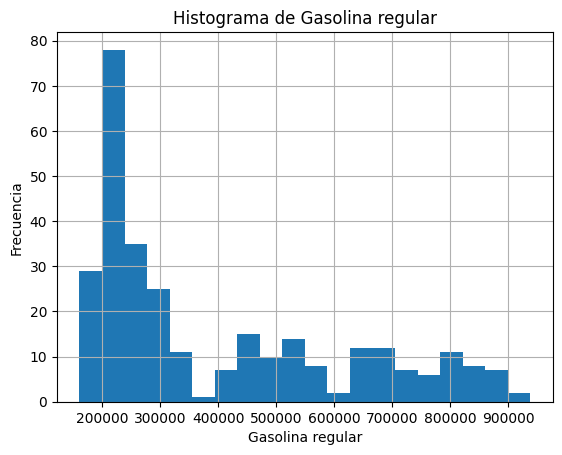

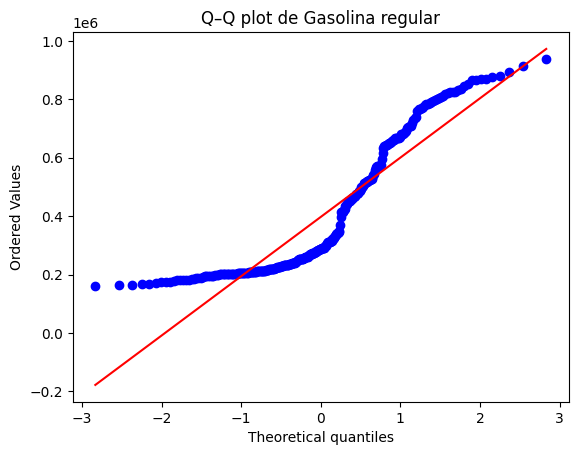

Shapiro–Wilk para Gasolina regular: W=0.8452, p‐value=0.0000



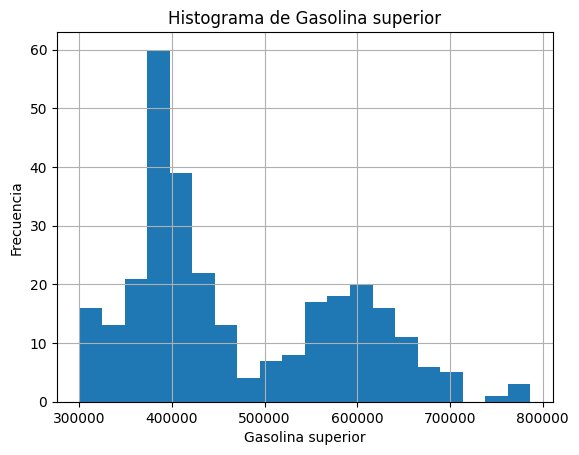

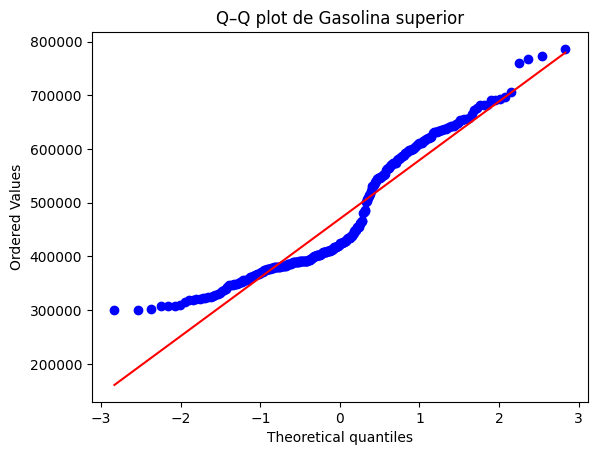

Shapiro–Wilk para Gasolina superior: W=0.9129, p‐value=0.0000



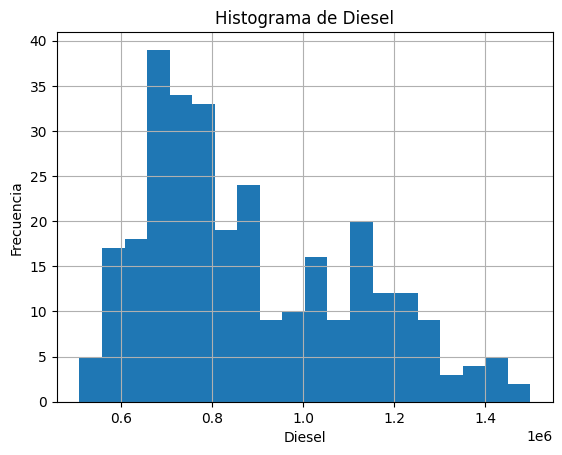

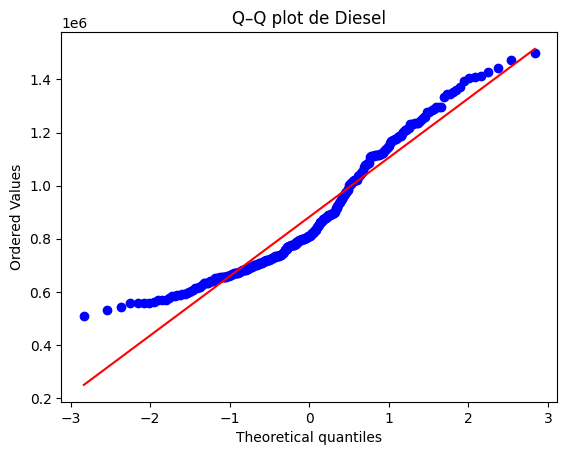

Shapiro–Wilk para Diesel: W=0.9370, p‐value=0.0000



In [15]:
for c in cols:
    plt.figure()
    df[c].hist(bins=20)
    plt.title(f'Histograma de {c}')
    plt.xlabel(c); plt.ylabel('Frecuencia')
    plt.show()

    plt.figure()
    stats.probplot(df[c], dist="norm", plot=plt)
    plt.title(f'Q–Q plot de {c}')
    plt.show()

    W, p = stats.shapiro(df[c])
    print(f"Shapiro–Wilk para {c}: W={W:.4f}, p‐value={p:.4f}\n")

## Agregar columnas de año y mes

In [17]:
df['Año'] = df['Fecha'].dt.year
df['Mes'] = df['Fecha'].dt.to_period('M')

## Top 10 meses con mayor consumo total

In [18]:
df['Total'] = df[cols].sum(axis=1)
top_meses = df.groupby('Mes')['Total'].sum().nlargest(10)
print("=== Top 10 meses por consumo total ===")
print(top_meses)

=== Top 10 meses por consumo total ===
Mes
2024-12    3186922.85
2024-10    3139354.48
2023-03    3006423.12
2024-05    2994636.30
2021-12    2984404.68
2024-03    2948472.17
2024-04    2922977.32
2023-12    2916898.69
2021-03    2893562.61
2023-05    2871803.56
Freq: M, Name: Total, dtype: float64


## Picos anuales por tipo de combustible

In [19]:
picos_anuales = df.groupby('Año')[cols].max()
print("\n=== Picos anuales por tipo ===")
print(picos_anuales)


=== Picos anuales por tipo ===
      Gasolina regular  Gasolina superior        Diesel
Año                                                    
2000     230020.700000      366987.560000  6.998072e+05
2001     225240.951667      403561.631667  7.360860e+05
2002     212711.711667      400645.415833  7.266726e+05
2003     219004.312500      392041.780000  7.864845e+05
2004     236733.030000      429109.100000  7.618643e+05
2005     241035.130000      448688.520000  8.039969e+05
2006     233936.830000      454373.130000  8.750473e+05
2007     252394.114286      454731.090000  9.566802e+05
2008     298245.470000      463343.730000  8.077258e+05
2009     296805.290000      454265.400000  8.916704e+05
2010     320985.410000      466766.780000  1.017058e+06
2011     291678.030000      449904.100000  9.004859e+05
2012     310407.040000      442191.430000  9.250653e+05
2013     339969.850000      448135.350000  9.661039e+05
2014     464223.150000      538899.260000  1.021378e+06
2015     499839.

## Evolución en los últimos 5 años

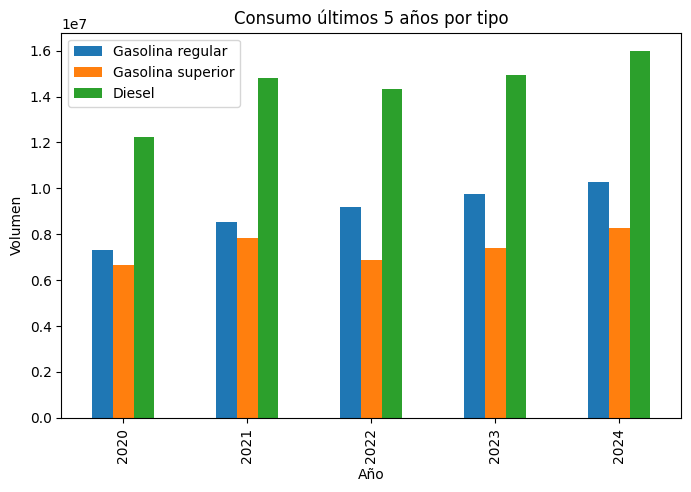

In [20]:
ultimo = df['Año'].max()
ult5 = df[df['Año'] >= ultimo - 4]
suma_ult5 = ult5.groupby('Año')[cols].sum()
suma_ult5.plot(kind='bar', figsize=(8,5))
plt.title('Consumo últimos 5 años por tipo')
plt.ylabel('Volumen')
plt.show()

## Comportamiento durante la pandemia (2020–2021)

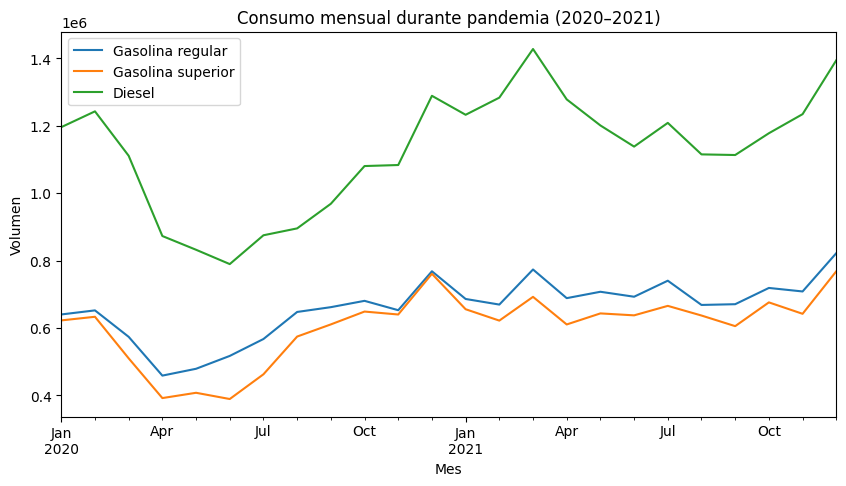

In [21]:
pandemia = df[df['Año'].isin([2020, 2021])]
mensual_pandemia = pandemia.groupby('Mes')[cols].sum()
mensual_pandemia.plot(figsize=(10,5))
plt.title('Consumo mensual durante pandemia (2020–2021)')
plt.ylabel('Volumen')
plt.show()